In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from os.path import exists

# Dateiname der RAW-Datei
CSV_NAME = "./assets/counter_herose_2020_wetter_hour.csv"

# Lese die Daten der CSV-Datei ein
df_bicyle_csv = pd.read_csv(CSV_NAME, sep = ";")

%matplotlib inline


In [3]:
# der Dateiname der zwischen Tabelle für Wetter-Daten
WEATHER_CSV = "./assets/df_weather.csv"

# initialisiere das DataFrame für die Wetter-Daten
df_weather = df_weather = pd.DataFrame({
    "weather": [ ],
    "sum_counter": [ ],
    "sum_bicycle": [ ]
})
# prüfe ob bereits eine Datei existiert (Zeit sparen)
if not exists(WEATHER_CSV):
    
    for row_index, row_csv in df_bicyle_csv.iterrows():
        col_weather = row_csv["Symbol Wetter"]
        col_bicycle = row_csv["FahrradbrueckeFahrradbruecke"]
        
        add = True
        for index, row_wet in df_weather.iterrows():
            wdf = row_wet["weather"]
            cnt = row_wet["sum_counter"]
            bic = row_wet["sum_bicycle"]
            
            if (col_weather == wdf):
                df_weather.loc[index] = [wdf, cnt + 1, col_bicycle + bic]
                add = False
        if add:
            df_weather.loc[len(df_weather)] = [col_weather, 1, col_bicycle]
    # print (df_weather)
    df_weather.to_csv(WEATHER_CSV)
else:
    df_weather = pd.read_csv(WEATHER_CSV)

In [4]:
import datetime
from datetime import datetime

# Pfad und Dateiname wo die Daten gespeichert werden sollen
TIME_CNT_CSV = "./assets/df_time_cnt.csv"

# Setzt die Indexvalues zurück
df_bicyle_csv.reset_index()

# initialisiert das pandas DataFrame für das zwischen Speichern der bearbeiten Variabeln
df_time_cnt = pd.DataFrame({ "date": [], "sum_bike": [], "mean_tmp": [], "sum_dates": [] })

# Macht aus einem String ein Date-Objekt (ohne Zeit)
def get_date(datetime_str: str):
    dt = datetime.strptime(datetime_str, "%d.%m.%Y %H:%M")
    return dt.date()

# Prüft ab ob bereits eine Datei erstellt wurde
if not exists(TIME_CNT_CSV):
    # iteriere die Zeilen der CSV Datei
    for index, row_csv in df_bicyle_csv.iterrows():
        tempC = row_csv["Temperatur (°C)"] # Temperatur von Stunde x am Tag x
        bike_cnt = row_csv["FahrradbrueckeFahrradbruecke"] # Anzahl der Fahrradfahrer von Stunde x am Tag x
        __datetime_str = row_csv["Zeit"] # Zeitstempel als String
        date_l = get_date(__datetime_str) # Datum als Date-Objekt ohne Zeit
        
        add = True 
        # iteriere die aktuelle Tabelle, um doppelte Einträge (über das Datum) zu migrieren
        for index, row_tc in df_time_cnt.iterrows():
            if row_tc["date"] == date_l:
                # Das Datum ist bereits in der Tabelle
                add = False
                # passe die Daten an
                df_time_cnt.loc[index] = [date_l, row_tc["sum_bike"] + bike_cnt, row_tc["mean_tmp"] + tempC, row_tc["sum_dates"] + 1]
        if add:
            # Es gibt keine Daten mit dem Datum, füge eine neue Zeile hinzu
            df_time_cnt.loc[len(df_time_cnt)] = [date_l, bike_cnt, tempC, 1]
    
    # Hier wird der Durchschnitt der Temperatur berechnet
    for i, row_tc in df_time_cnt.iterrows():
        # von der aktuellen Zeile
        df_time_cnt.loc[i] = [row_tc["date"], row_tc["sum_bike"], row_tc["mean_tmp"] / row_tc["sum_dates"], row_tc["sum_dates"]]
    
    # Speicher die Daten in eine csv Datei (see TIME_CNT_CSV value)
    df_time_cnt.to_csv(TIME_CNT_CSV)
else:
    df_time_cnt = pd.read_csv(TIME_CNT_CSV)
    pd.to_datetime(df_time_cnt["date"])
# print(df_time_cnt["sum_dates"][0])

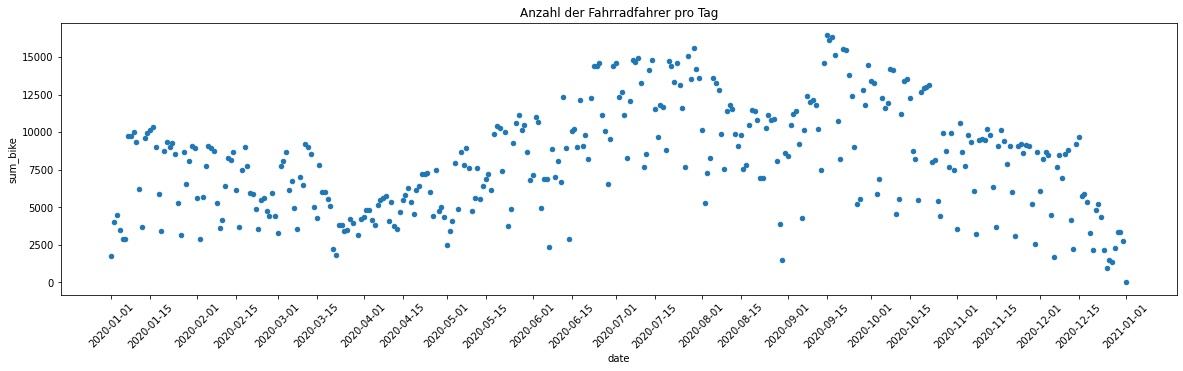

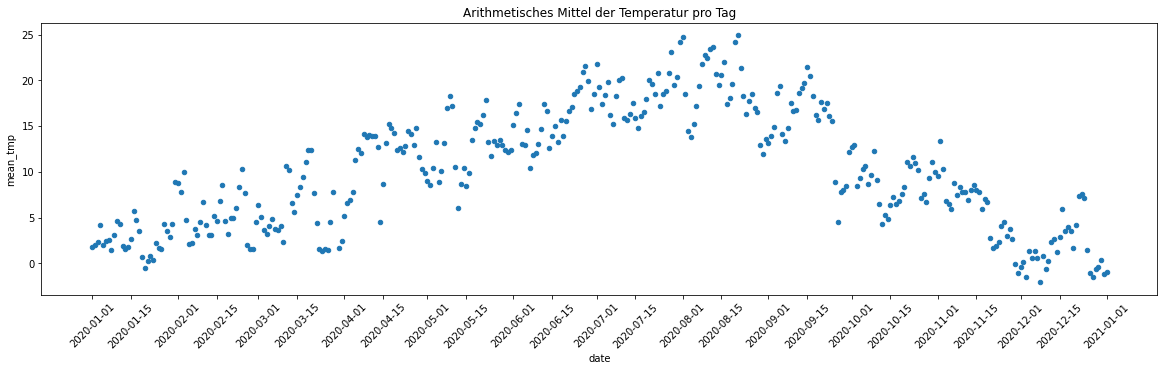

In [5]:
xticks = []
for i, row in df_time_cnt.iterrows():
    dt = datetime.strptime(row["date"], "%Y-%m-%d")
    if dt.day == 1 or dt.day == 15:
        xticks.append(row["date"]) 

# Plotte die Korrelation zwischen Anzahl der Fahrräder und das Datum
df_time_cnt.plot(y="sum_bike", x="date", kind="scatter", figsize=(20, 5), xticks=xticks, rot=45)
plt.title("Anzahl der Fahrradfahrer pro Tag")
plt.savefig("./assets/sum_bike_I_date.png", bbox_inches='tight')

# Plotte die Korrelation zwischen der durchschnitts Temperatur und das Datum 
df_time_cnt.plot(y="mean_tmp", x="date", kind="scatter", figsize=(20, 5), xticks=xticks, rot=45)
plt.title("Arithmetisches Mittel der Temperatur pro Tag")
plt.savefig("./assets/mean_tmp_I_date.png", bbox_inches='tight')


In [6]:
# FÜr Anzahl der Fahrradfahrer
# berechne Median, Modalwert, Mittelwert, 75%-Quantil, 25%-Quantil
print("Anzahl der Fahrradfahrer")
print("-------------------------")
col = df_time_cnt["sum_bike"]

median = col.median()
modal = col.mode()
mean = col.mean()
q25 = col.quantile(.25)
q75 = col.quantile(.75)
print("median =", median)
print("modal =", modal)
print("mean =", mean)
print("q25 =", q25)
print("q75 =", q75)

# Für Temperatur
# berechne Median, Modalwert, Mittelwert, 75%-Quantil, 25%-Quantil
col = df_time_cnt["mean_tmp"]


print("\nTemperatur")
print("-------------------------")

median = col.median()
modal = col.mode()
mean = col.mean()
q25 = col.quantile(.25)
q75 = col.quantile(.75)
print("median =", median)
print("modal =", modal)
print("mean =", mean)
print("q25 =", q25)
print("q75 =", q75)

Anzahl der Fahrradfahrer
-------------------------
median = 8149.5
modal = 0    9098.0
Name: sum_bike, dtype: float64
mean = 8080.254098360656
q25 = 5312.75
q75 = 10207.5

Temperatur
-------------------------
median = 10.020833333333332
modal = 0     1.541667
1     7.791667
2    13.958333
3    17.416667
Name: mean_tmp, dtype: float64
mean = 10.208219489981785
q25 = 4.458333333333333
q75 = 15.572916666666668


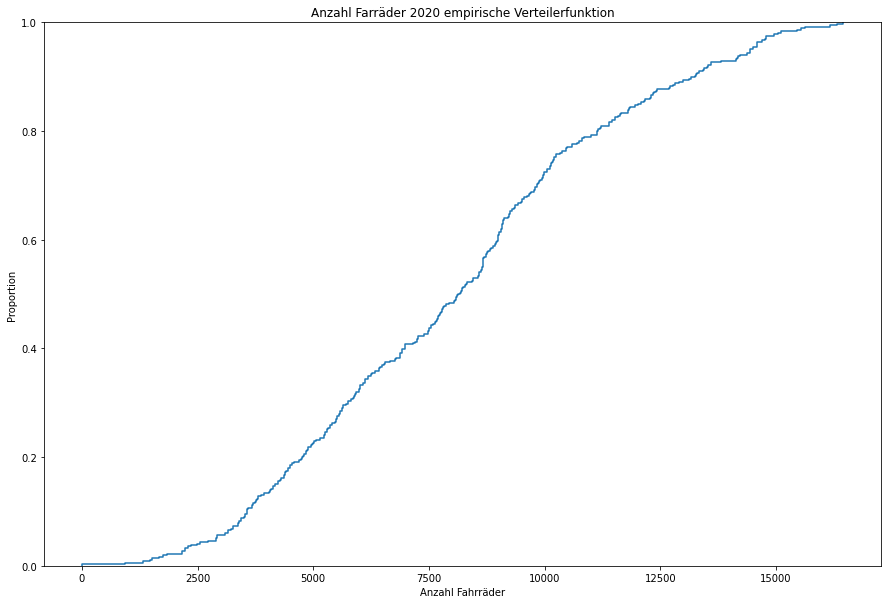

In [27]:
import seaborn as sns
import numpy as np

# Setzt die Größer der Figure
plt.figure(figsize=(15,10))
# Plotte eine Empirische Verteilungsfunktion
sns.ecdfplot(data=df_time_cnt["sum_bike"])

#plt.xticks(xticks)

plt.title("Anzahl Farräder 2020 empirische Verteilerfunktion")
plt.xlabel("Anzahl Fahrräder")
# Zeige den Plot an
plt.show()